In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('SF data summary lag 12.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,3/1/2005,219.293373,5.93,55702,4149.607,5.1,284589.379,798.882,40.30%,357406,0.30%,1201,2.90,182.9
1,4/1/2005,218.824090,5.86,60712,4162.783,4.7,302385.828,798.882,40.30%,364189,0.30%,1239,3.01,182.9
2,5/1/2005,218.024126,5.72,60712,4162.783,4.5,302385.828,798.882,40.30%,364189,0.30%,1304,2.58,180.6
3,6/1/2005,216.546742,5.58,60712,4162.783,4.9,302385.828,798.882,40.30%,364189,0.30%,1345,3.00,180.6
4,7/1/2005,214.984512,5.70,60712,4162.783,5.0,302385.828,798.882,40.10%,367957,0.30%,1337,3.20,183.4
5,8/1/2005,214.309913,5.82,60712,4162.783,4.8,302385.828,798.882,40.10%,367957,0.30%,1271,3.19,183.4
6,9/1/2005,213.558825,5.77,60712,4162.783,4.7,302385.828,798.882,40.10%,367957,0.30%,2150,3.34,187.2
7,10/1/2005,213.363511,6.07,60712,4162.783,4.6,302385.828,798.882,40.20%,375275,0.30%,936,3.54,187.2
8,11/1/2005,213.268922,6.33,60712,4162.783,4.7,302385.828,798.882,40.20%,375275,0.30%,1673,3.95,183.1
9,12/1/2005,213.159673,6.27,60712,4162.783,4.1,302385.828,798.882,40.20%,375275,0.30%,1228,4.28,183.1


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,219.293373,5.93,55702,4149.607,5.1,284589.379,798.882,357406,1201,2.90,182.9,40.3,0.3
1,4/1/2005,218.824090,5.86,60712,4162.783,4.7,302385.828,798.882,364189,1239,3.01,182.9,40.3,0.3
2,5/1/2005,218.024126,5.72,60712,4162.783,4.5,302385.828,798.882,364189,1304,2.58,180.6,40.3,0.3
3,6/1/2005,216.546742,5.58,60712,4162.783,4.9,302385.828,798.882,364189,1345,3.00,180.6,40.3,0.3
4,7/1/2005,214.984512,5.70,60712,4162.783,5.0,302385.828,798.882,367957,1337,3.20,183.4,40.1,0.3


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,55702,4149.607,5.1,284589.379,798.8820,357406,1201,2.90,182.900,40.3,0.3
1,5.86,60712,4162.783,4.7,302385.828,798.8820,364189,1239,3.01,182.900,40.3,0.3
2,5.72,60712,4162.783,4.5,302385.828,798.8820,364189,1304,2.58,180.600,40.3,0.3
3,5.58,60712,4162.783,4.9,302385.828,798.8820,364189,1345,3.00,180.600,40.3,0.3
4,5.70,60712,4162.783,5.0,302385.828,798.8820,367957,1337,3.20,183.400,40.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
137,3.44,93165,4712.421,4.0,528286.844,710.5509,372395,861,4.67,233.405,34.7,0.7
138,3.46,93165,4712.421,3.8,528286.844,710.5509,372395,1723,4.46,233.599,34.7,0.7
139,3.47,93165,4712.421,3.8,528286.844,710.5509,372434,1399,4.15,233.599,34.5,0.6
140,3.77,93165,4712.421,3.6,528286.844,710.5509,372434,1596,4.02,231.574,34.5,0.6


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),142.0,4.834930,1.054379,3.3500,3.92500,4.5550,5.927500,6.7600
Personal_Income,142.0,71069.274648,10794.216129,55702.0000,62995.00000,67979.5000,76355.000000,93165.0000
Resident_Population,142.0,4440.874789,181.380218,4149.6070,4317.85300,4425.5990,4584.981000,4712.4210
Unemployment_Rate,142.0,6.269718,2.199645,3.5000,4.40000,5.4500,8.375000,10.3000
GDP,142.0,377977.087599,72518.422320,284589.3790,318298.15800,348971.9240,419485.442000,528286.8440
Crime_Rate,142.0,776.754989,71.599963,659.6285,705.78810,776.8164,846.596275,875.6375
Median_Debt,142.0,388614.894366,20190.157288,357406.0000,370086.00000,382935.0000,409243.500000,421588.0000
New_Structures,142.0,801.697183,445.067562,136.0000,411.25000,765.0000,1126.750000,2150.0000
Economic_Conditions_Index,142.0,2.991408,3.484555,-9.4500,2.25250,4.0500,5.265000,7.0400
CPI less shelter,142.0,212.288254,15.715950,180.6000,199.44975,213.0660,225.996500,233.5990


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.038593,-1.423658,-1.605841,-0.531776,-1.287779,0.309037,-1.545748,0.897173,-0.026232,-1.869964,0.711053,-1.126177
1,0.972203,-0.959521,-1.533198,-0.713623,-1.042373,0.309037,-1.209792,0.982554,0.005335,-1.869964,0.711053,-1.126177
2,0.839424,-0.959521,-1.533198,-0.804547,-1.042373,0.309037,-1.209792,1.128599,-0.118066,-2.016312,0.711053,-1.126177
3,0.706644,-0.959521,-1.533198,-0.622700,-1.042373,0.309037,-1.209792,1.220720,0.002466,-2.016312,0.711053,-1.126177
4,0.820455,-0.959521,-1.533198,-0.577238,-1.042373,0.309037,-1.023167,1.202745,0.059862,-1.838149,0.619346,-1.126177
...,...,...,...,...,...,...,...,...,...,...,...,...
137,-1.322987,2.046997,1.497110,-1.031857,2.072711,-0.924639,-0.803357,0.133245,0.481723,1.343651,-1.856746,-0.956278
138,-1.304019,2.046997,1.497110,-1.122780,2.072711,-0.924639,-0.803357,2.070029,0.421457,1.355995,-1.856746,-0.956278
139,-1.294534,2.046997,1.497110,-1.122780,2.072711,-0.924639,-0.801425,1.342050,0.332493,1.355995,-1.948453,-0.998753
140,-1.010007,2.046997,1.497110,-1.213704,2.072711,-0.924639,-0.801425,1.784679,0.295186,1.227145,-1.948453,-0.998753


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

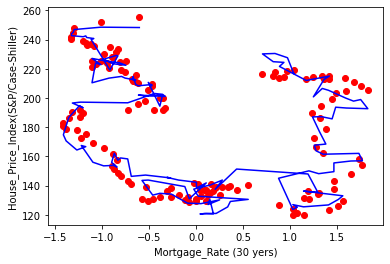

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 6.98
Accuracy: 95.73 %.


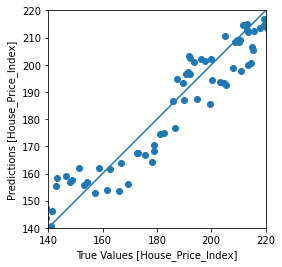

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.955124823584034

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,-0.962402
1,45.887301
2,-22.526798
3,3.548019
4,-6.914792
5,4.149848
6,-19.047069
7,0.456831
8,-9.179101
9,-13.039349


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[216.88881116 227.62244389 230.53535118 230.24404619 224.90670903
 224.43317559 221.67179581 212.04817507 215.0503273  212.81123959
 200.82502995 206.57989558 205.29777777 200.03081228 197.89560534
 198.96649274 192.7134992  193.16528017 193.73121537 185.74085897
 187.24336261 187.07296138 176.78980994 168.46995466 167.68089968
 163.84244815 161.51383023 162.08844566 157.03250782 156.86140563
 155.54186956 149.57280902 148.18485377 150.12516897 145.06690287
 123.68350535 125.18851943 126.98029512 125.47310654 126.77478677
 130.54726112 133.03284826 136.25155044 135.39996822 147.97993008
 151.34981441 137.46847446 143.80348054 140.52789539 137.59070892
 132.72921627 130.57148393 129.15273062 125.42378978 120.93609294
 120.9156877  120.58651809 120.85341256 120.68834924 130.53304337
 127.05980143 130.24726249 127.65770969 127.98108449 134.16983604
 134.72382996 133.48232483 143.56331966 143.81349875 139.35270654
 130.94574507 141.84771001 138.40462243 142.28393631 143.81743802
 145.63898

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,216.888811
1,227.622444
2,230.535351
3,230.244046
4,224.906709
...,...
137,244.036144
138,244.972300
139,246.925073
140,248.553420


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
Mortgage_Rate (30 yers),1.038593,0.972203,0.839424,0.706644,0.820455,0.934266,0.886845,1.171373,1.417963,1.361058,...,-1.085881,-1.161755,-1.171239,-1.199692,-1.322987,-1.322987,-1.304019,-1.294534,-1.010007,-0.602184
Personal_Income,-1.423658,-0.959521,-0.959521,-0.959521,-0.959521,-0.959521,-0.959521,-0.959521,-0.959521,-0.959521,...,2.046997,2.046997,2.046997,2.046997,2.046997,2.046997,2.046997,2.046997,2.046997,2.046997
Resident_Population,-1.605841,-1.533198,-1.533198,-1.533198,-1.533198,-1.533198,-1.533198,-1.533198,-1.533198,-1.533198,...,1.497110,1.497110,1.497110,1.497110,1.497110,1.497110,1.497110,1.497110,1.497110,1.497110
Unemployment_Rate,-0.531776,-0.713623,-0.804547,-0.622700,-0.577238,-0.668162,-0.713623,-0.759085,-0.713623,-0.986395,...,-1.031857,-1.168242,-1.259166,-1.031857,-0.940933,-1.031857,-1.122780,-1.122780,-1.213704,-1.259166
GDP,-1.287779,-1.042373,-1.042373,-1.042373,-1.042373,-1.042373,-1.042373,-1.042373,-1.042373,-1.042373,...,2.072711,2.072711,2.072711,2.072711,2.072711,2.072711,2.072711,2.072711,2.072711,2.072711
Crime_Rate,0.309037,0.309037,0.309037,0.309037,0.309037,0.309037,0.309037,0.309037,0.309037,0.309037,...,-0.924639,-0.924639,-0.924639,-0.924639,-0.924639,-0.924639,-0.924639,-0.924639,-0.924639,-0.924639
Median_Debt,-1.545748,-1.209792,-1.209792,-1.209792,-1.023167,-1.023167,-1.023167,-0.660713,-0.660713,-0.660713,...,-0.699989,-0.804000,-0.804000,-0.804000,-0.803357,-0.803357,-0.803357,-0.801425,-0.801425,-0.801425
New_Structures,0.897173,0.982554,1.128599,1.220720,1.202745,1.054453,3.029434,0.301758,1.957687,0.957838,...,1.130846,-0.143118,2.377848,0.337708,0.002927,0.133245,2.070029,1.342050,1.784679,1.546513
Economic_Conditions_Index,-0.026232,0.005335,-0.118066,0.002466,0.059862,0.056992,0.100039,0.157435,0.275097,0.369801,...,0.260748,0.567818,0.455895,0.507552,0.648172,0.481723,0.421457,0.332493,0.295186,0.249269
CPI less shelter,-1.869964,-1.869964,-2.016312,-2.016312,-1.838149,-1.838149,-1.596356,-1.596356,-1.857238,-1.857238,...,1.264050,1.264050,1.323926,1.323926,1.343651,1.343651,1.355995,1.355995,1.227145,1.227145


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,132,133,134,135,136,137,138,139,140,141
0,Mortgage_Rate (30 yers),1.038593,0.972203,0.839424,0.706644,0.820455,0.934266,0.886845,1.171373,1.417963,...,-1.085881,-1.161755,-1.171239,-1.199692,-1.322987,-1.322987,-1.304019,-1.294534,-1.010007,-0.602184
1,Personal_Income,-1.423658,-0.959521,-0.959521,-0.959521,-0.959521,-0.959521,-0.959521,-0.959521,-0.959521,...,2.046997,2.046997,2.046997,2.046997,2.046997,2.046997,2.046997,2.046997,2.046997,2.046997
2,Resident_Population,-1.605841,-1.533198,-1.533198,-1.533198,-1.533198,-1.533198,-1.533198,-1.533198,-1.533198,...,1.497110,1.497110,1.497110,1.497110,1.497110,1.497110,1.497110,1.497110,1.497110,1.497110
3,Unemployment_Rate,-0.531776,-0.713623,-0.804547,-0.622700,-0.577238,-0.668162,-0.713623,-0.759085,-0.713623,...,-1.031857,-1.168242,-1.259166,-1.031857,-0.940933,-1.031857,-1.122780,-1.122780,-1.213704,-1.259166
4,GDP,-1.287779,-1.042373,-1.042373,-1.042373,-1.042373,-1.042373,-1.042373,-1.042373,-1.042373,...,2.072711,2.072711,2.072711,2.072711,2.072711,2.072711,2.072711,2.072711,2.072711,2.072711
5,Crime_Rate,0.309037,0.309037,0.309037,0.309037,0.309037,0.309037,0.309037,0.309037,0.309037,...,-0.924639,-0.924639,-0.924639,-0.924639,-0.924639,-0.924639,-0.924639,-0.924639,-0.924639,-0.924639
6,Median_Debt,-1.545748,-1.209792,-1.209792,-1.209792,-1.023167,-1.023167,-1.023167,-0.660713,-0.660713,...,-0.699989,-0.804000,-0.804000,-0.804000,-0.803357,-0.803357,-0.803357,-0.801425,-0.801425,-0.801425
7,New_Structures,0.897173,0.982554,1.128599,1.220720,1.202745,1.054453,3.029434,0.301758,1.957687,...,1.130846,-0.143118,2.377848,0.337708,0.002927,0.133245,2.070029,1.342050,1.784679,1.546513
8,Economic_Conditions_Index,-0.026232,0.005335,-0.118066,0.002466,0.059862,0.056992,0.100039,0.157435,0.275097,...,0.260748,0.567818,0.455895,0.507552,0.648172,0.481723,0.421457,0.332493,0.295186,0.249269
9,CPI less shelter,-1.869964,-1.869964,-2.016312,-2.016312,-1.838149,-1.838149,-1.596356,-1.596356,-1.857238,...,1.264050,1.264050,1.323926,1.323926,1.343651,1.343651,1.355995,1.355995,1.227145,1.227145


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),-0.962402
1,Personal_Income,45.887301
2,Resident_Population,-22.526798
3,Unemployment_Rate,3.548019
4,GDP,-6.914792
5,Crime_Rate,4.149848
6,Median_Debt,-19.047069
7,New_Structures,0.456831
8,Economic_Conditions_Index,-9.179101
9,CPI less shelter,-13.039349


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

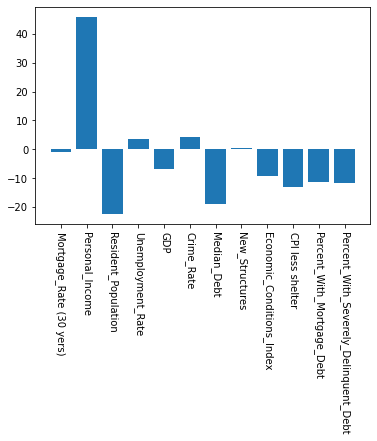

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,1/1/2017,234.895356,4.15,93165,4712.421,3.9,528286.844,715.003,35.00%,374842,0.60%,839,4.13,233.234
1,2/1/2017,236.871020,4.17,100236,4726.314,3.6,562155.764,715.003,35.00%,374842,0.60%,1017,4.51,233.234
2,3/1/2017,235.886510,4.20,100236,4726.314,3.4,562155.764,715.003,35.00%,374842,0.60%,1003,4.54,236.481
3,4/1/2017,236.216851,4.05,100236,4726.314,3.2,562155.764,715.003,34.70%,374524,0.50%,1444,4.08,236.481
4,5/1/2017,237.583333,4.01,100236,4726.314,3.1,562155.764,715.003,34.70%,374524,0.50%,1356,4.52,237.107
5,6/1/2017,239.080717,3.90,100236,4726.314,3.5,562155.764,715.003,34.70%,374524,0.50%,2358,4.72,237.107
6,7/1/2017,240.733514,3.97,100236,4726.314,3.7,562155.764,715.003,34.70%,375162,0.50%,1407,4.30,235.803
7,8/1/2017,242.109323,3.88,100236,4726.314,3.6,562155.764,715.003,34.70%,375162,0.50%,1582,4.20,235.803
8,9/1/2017,244.795861,3.81,100236,4726.314,3.1,562155.764,715.003,34.70%,375162,0.50%,906,4.48,237.011
9,10/1/2017,248.251792,3.90,100236,4726.314,3.0,562155.764,715.003,34.40%,376057,0.50%,1576,4.61,237.011


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1/1/2017,234.895356,4.15,93165,4712.421,3.9,528286.844,715.003,374842,839,4.13,233.234,35.0,0.6
1,2/1/2017,236.871020,4.17,100236,4726.314,3.6,562155.764,715.003,374842,1017,4.51,233.234,35.0,0.6
2,3/1/2017,235.886510,4.20,100236,4726.314,3.4,562155.764,715.003,374842,1003,4.54,236.481,35.0,0.6
3,4/1/2017,236.216851,4.05,100236,4726.314,3.2,562155.764,715.003,374524,1444,4.08,236.481,34.7,0.5
4,5/1/2017,237.583333,4.01,100236,4726.314,3.1,562155.764,715.003,374524,1356,4.52,237.107,34.7,0.5


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,4.15,93165,4712.421,3.9,528286.844,715.003,374842,839,4.13,233.234,35.0,0.6
1,4.17,100236,4726.314,3.6,562155.764,715.003,374842,1017,4.51,233.234,35.0,0.6
2,4.20,100236,4726.314,3.4,562155.764,715.003,374842,1003,4.54,236.481,35.0,0.6
3,4.05,100236,4726.314,3.2,562155.764,715.003,374524,1444,4.08,236.481,34.7,0.5
4,4.01,100236,4726.314,3.1,562155.764,715.003,374524,1356,4.52,237.107,34.7,0.5
5,3.90,100236,4726.314,3.5,562155.764,715.003,374524,2358,4.72,237.107,34.7,0.5
6,3.97,100236,4726.314,3.7,562155.764,715.003,375162,1407,4.30,235.803,34.7,0.5
7,3.88,100236,4726.314,3.6,562155.764,715.003,375162,1582,4.20,235.803,34.7,0.5
8,3.81,100236,4726.314,3.1,562155.764,715.003,375162,906,4.48,237.011,34.7,0.5
9,3.90,100236,4726.314,3.0,562155.764,715.003,376057,1576,4.61,237.011,34.4,0.5


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,3.992500,0.125635,3.810,3.900,3.9600,4.0750,4.200
Personal_Income,12.0,99646.750000,2041.221877,93165.000,100236.000,100236.0000,100236.0000,100236.000
Resident_Population,12.0,4725.156250,4.010564,4712.421,4726.314,4726.3140,4726.3140,4726.314
Unemployment_Rate,12.0,3.316667,0.348590,2.800,3.075,3.3000,3.6000,3.900
GDP,12.0,559333.354000,9777.115040,528286.844,562155.764,562155.7640,562155.7640,562155.764
Crime_Rate,12.0,715.003000,0.000000,715.003,715.003,715.0030,715.0030,715.003
Median_Debt,12.0,375146.250000,597.603567,374524.000,374762.500,375002.0000,375385.7500,376057.000
New_Structures,12.0,1405.333333,448.644288,839.000,1013.500,1389.5000,1577.5000,2358.000
Economic_Conditions_Index,12.0,4.488333,0.271288,4.080,4.275,4.5150,4.6375,4.950
CPI less shelter,12.0,235.957333,1.359762,233.234,235.803,236.2945,237.0110,237.107


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.649605,2.046997,1.497110,-1.077319,2.072711,-0.862458,-0.682159,0.083814,0.326754,1.332770,-1.719185,-0.998753
1,-0.630636,2.702070,1.573706,-1.213704,2.539750,-0.862458,-0.682159,0.483753,0.435806,1.332770,-1.719185,-0.998753
2,-0.602184,2.702070,1.573706,-1.304628,2.539750,-0.862458,-0.682159,0.452297,0.444416,1.539375,-1.719185,-0.998753
3,-0.744447,2.702070,1.573706,-1.395552,2.539750,-0.862458,-0.697909,1.443158,0.312405,1.539375,-1.856746,-1.041227
4,-0.782384,2.702070,1.573706,-1.441014,2.539750,-0.862458,-0.697909,1.245435,0.438676,1.579208,-1.856746,-1.041227
5,-0.886711,2.702070,1.573706,-1.259166,2.539750,-0.862458,-0.697909,3.496779,0.496072,1.579208,-1.856746,-1.041227
6,-0.820322,2.702070,1.573706,-1.168242,2.539750,-0.862458,-0.666310,1.360025,0.375541,1.496235,-1.856746,-1.041227
7,-0.905680,2.702070,1.573706,-1.213704,2.539750,-0.862458,-0.666310,1.753223,0.346842,1.496235,-1.856746,-1.041227
8,-0.972070,2.702070,1.573706,-1.441014,2.539750,-0.862458,-0.666310,0.234353,0.427197,1.573099,-1.856746,-1.041227
9,-0.886711,2.702070,1.573706,-1.486475,2.539750,-0.862458,-0.621981,1.739742,0.464505,1.573099,-1.994306,-1.041227


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[241.67340292 265.45754302 262.3201642  266.12539719 264.23183812
 265.47907993 266.34805929 266.71195663 263.53563768 264.32874661
 264.13582155 264.25339419]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,241.673403
1,265.457543
2,262.320164
3,266.125397
4,264.231838
5,265.479080
6,266.348059
7,266.711957
8,263.535638
9,264.328747
